로지스틱 회귀-유방암
==
- 로지스틱회귀의 개념
- BreastCancer.csv

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, SGDClassifier
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [107]:
pass_time = [8,9, 9, 9.5, 10, 12, 14, 13,14.5, 15, 16, 16, 16.5, 17, 17, 17, 17.5,20, 20, 20]
fail_time = [1, 2, 2.1,2.6,2.7,2.8,2.9, 4, 2, 5, 6,3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4]
tv_pass = [1, 2, 2.1,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4, 4, 2, 1, 6]
tv_fail = [8,9, 9, 9.5, 10, 12, 14, 14.5, 15, 16, 16, 20 ,16.5, 17, 17, 17, 17.5,20, 20, 20]
X1 = np.hstack((pass_time, fail_time))
X2 = np.hstack((tv_pass, tv_fail))

X = np.vstack((X1,X2)).T      # ndarray
# X = np.vstack(zip(list((X1,X2)))).T      # ndarray
Z = pd.DataFrame({'study': X1, 'TV':X2}) # 데이터프레임

In [109]:
Z

,study,TV
0,8.0,1.0
1,9.0,2.0
2,9.0,2.1
3,9.5,2.6
4,10.0,2.7
5,12.0,2.8
6,14.0,2.9
7,13.0,3.0
8,14.5,3.2
9,15.0,3.4


In [110]:
y1=[1]*len(pass_time)
y0=[0]*len(fail_time)
y = np.hstack((y1,y0))

In [111]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

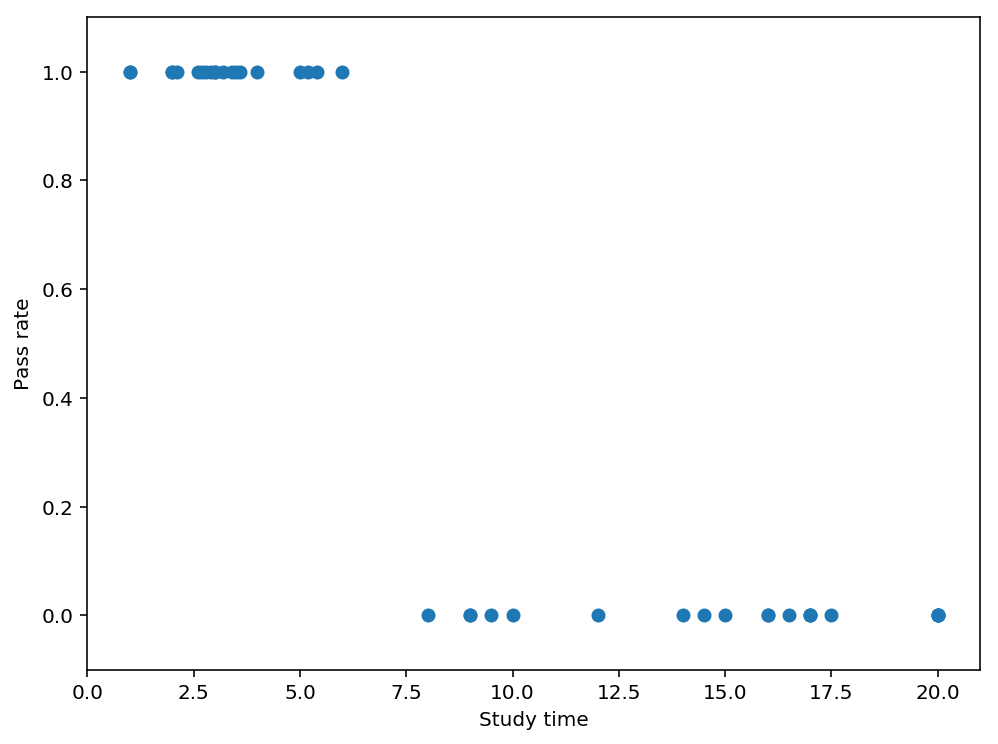

In [113]:
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 21)
plt.ylim(-0.1, 1.1)
plt.xlabel("Study time")
plt.ylabel("Pass rate")
plt.scatter(X[:,1], y)
# plt.scatter(Z['TV'], y)
plt.show()

In [73]:
model = LogisticRegression()
model.fit(X,y)
model.fit(Z,y)

print(model.coef_)
print(model.intercept_)

[[ 0.61033315 -0.60988145]]
[0.00077909]


In [114]:
Z.get_values()
# pd.DataFrame( ,)

array([[ 8. ,  1. ],
       [ 9. ,  2. ],
       [ 9. ,  2.1],
       [ 9.5,  2.6],
       [10. ,  2.7],
       [12. ,  2.8],
       [14. ,  2.9],
       [13. ,  3. ],
       [14.5,  3.2],
       [15. ,  3.4],
       [16. ,  3.5],
       [16. ,  3.6],
       [16.5,  3. ],
       [17. ,  5. ],
       [17. ,  5.2],
       [17. ,  5.4],
       [17.5,  4. ],
       [20. ,  2. ],
       [20. ,  1. ],
       [20. ,  6. ],
       [ 1. ,  8. ],
       [ 2. ,  9. ],
       [ 2.1,  9. ],
       [ 2.6,  9.5],
       [ 2.7, 10. ],
       [ 2.8, 12. ],
       [ 2.9, 14. ],
       [ 4. , 14.5],
       [ 2. , 15. ],
       [ 5. , 16. ],
       [ 6. , 16. ],
       [ 3. , 20. ],
       [ 3.2, 16.5],
       [ 3.4, 17. ],
       [ 3.5, 17. ],
       [ 3.6, 17. ],
       [ 3. , 17.5],
       [ 5. , 20. ],
       [ 5.2, 20. ],
       [ 5.4, 20. ]])

In [54]:
a1, a2, b = model.coef_[0][0], model.coef_[0][1], model.intercept_[0]
a1,a2,b

(0.610333151664672, -0.6098814541923245, 0.0007790921593602521)

In [80]:
model.predict_proba([[5,3],[6,3],[7,1],[8,8]])

array([[0.22744399, 0.77255601],
       [0.13786539, 0.86213461],
       [0.02500809, 0.97499191],
       [0.49890183, 0.50109817]])

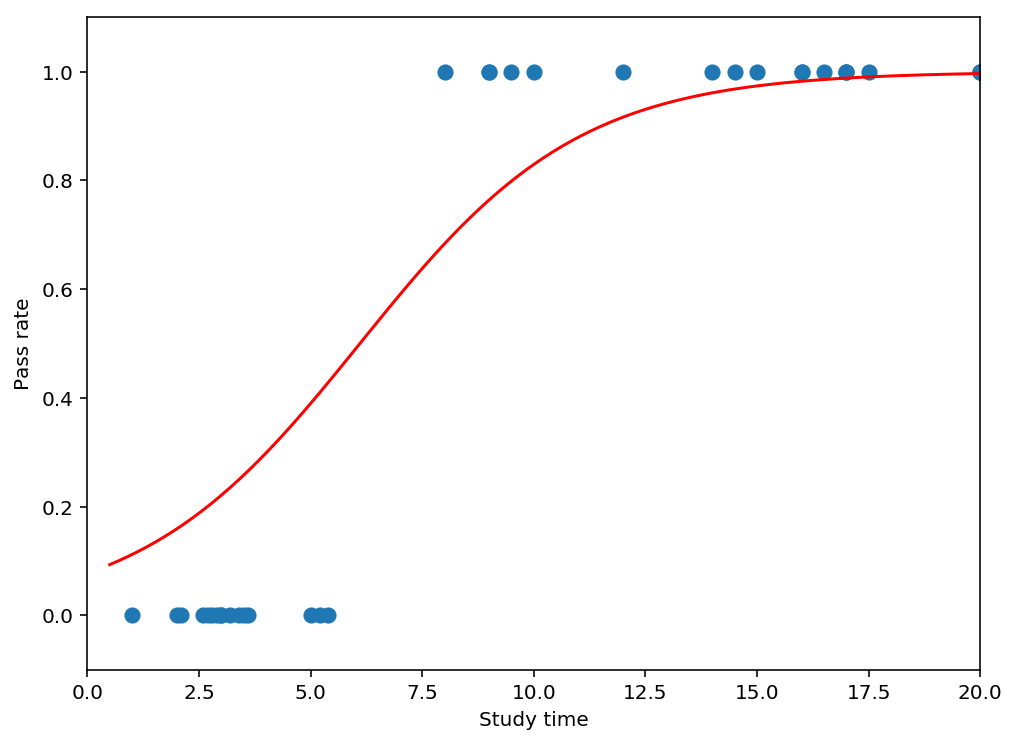

In [29]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Study time')
plt.ylabel('Pass rate')
plt.scatter(X, y, s=50)

XX = np.linspace(0.5,21, 100)
yy = logreg(a[0][0]*XX + b[0])
plt.plot(XX, yy, c='r')
# plt.show()

In [60]:
clf1 = SGDClassifier()
clf1.fit(X,y)

/Users/hwa-jongkim/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

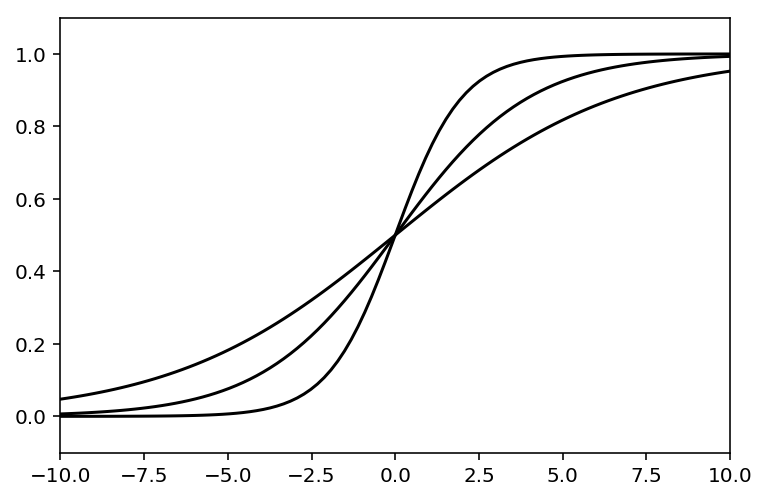

In [42]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a_list = [0.3, 0.5, 1]
b_list = [0]
XX = np.linspace(-10, 10, 100)
for a in a_list:
    for b in b_list: 
        yy = logreg(a*XX + b)
        plt.plot(XX, yy, c='k')

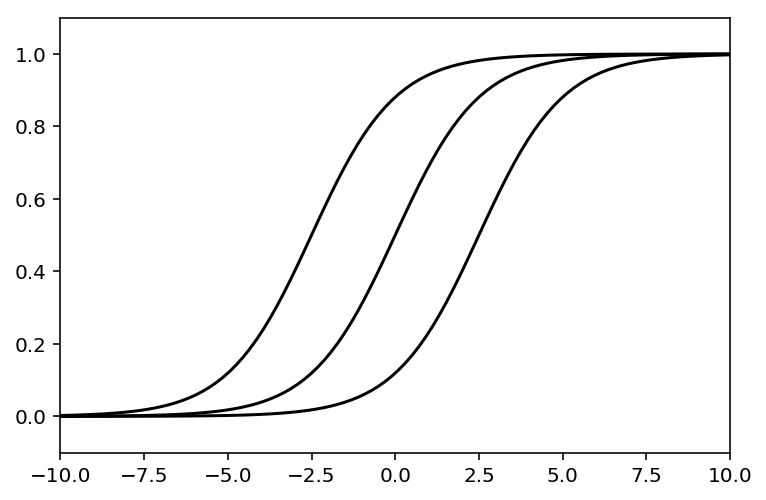

In [45]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a_list = [0.8]
b_list = [-2, 0, 2]
XX = np.linspace(-10, 10, 100)
for a in a_list:
    for b in b_list: 
        yy = logreg(a*XX + b)
        plt.plot(XX, yy, c='k')

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   # K-fold cross validation
from sklearn import metrics

/Users/hwa-jongkim/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [88]:
from sklearn.datasets import load_breast_cancer

In [115]:
data_all = load_breast_cancer()
type(data_all)

sklearn.utils.Bunch

In [106]:
data = data_all.data
data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [101]:
data_all.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [96]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [120]:
df = pd.DataFrame(data, columns=data_all.feature_names)
df["diagnosis"] = data_all.target
df[:3].T

,0,1,2
mean radius,17.990000,20.570000,19.690000
mean texture,10.380000,17.770000,21.250000
mean perimeter,122.800000,132.900000,130.000000
mean area,1001.000000,1326.000000,1203.000000
mean smoothness,0.118400,0.084740,0.109600
mean compactness,0.277600,0.078640,0.159900
mean concavity,0.300100,0.086900,0.197400
mean concave points,0.147100,0.070170,0.127900
mean symmetry,0.241900,0.181200,0.206900
mean fractal dimension,0.078710,0.056670,0.059990


In [121]:
df.shape

(569, 31)

In [124]:

#  /\data['diagnosis'].map({'M':1,'B':0})
df = df[["diagnosis", "mean radius", "mean texture"]]
df.head()

,diagnosis,mean radius,mean texture
0,0,17.99,10.38
1,0,20.57,17.77
2,0,19.69,21.25
3,0,11.42,20.38
4,0,20.29,14.34


In [125]:
model=LogisticRegression()
y = df["diagnosis"]

In [127]:
features = ["mean radius"]
X = df[features]
np.random.seed(11)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 85.96%


In [18]:
print(model.coef_)
print(model.intercept_)

[[0.48325363]]
[-7.3485004]


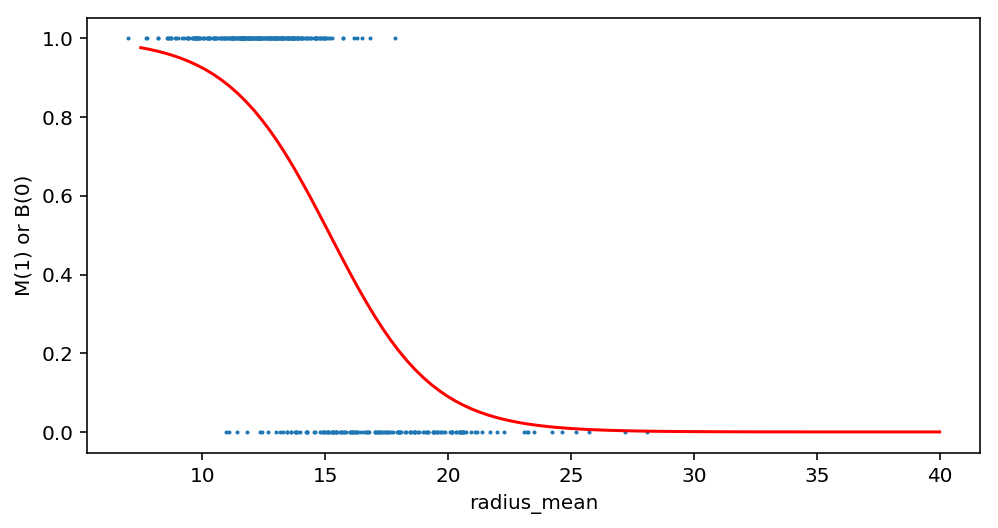

In [128]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("radius_mean")
plt.ylabel("M(1) or B(0)")

def logreg(x):
    return 1 / (1 + np.exp(-x))

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logreg(model.coef_ * XX + model.intercept_)[0], c='r')

In [130]:
features = ["mean texture"]
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 64.33%


In [131]:
print(model.coef_)
print(model.intercept_)

[[-0.16165694]]
[3.77228744]


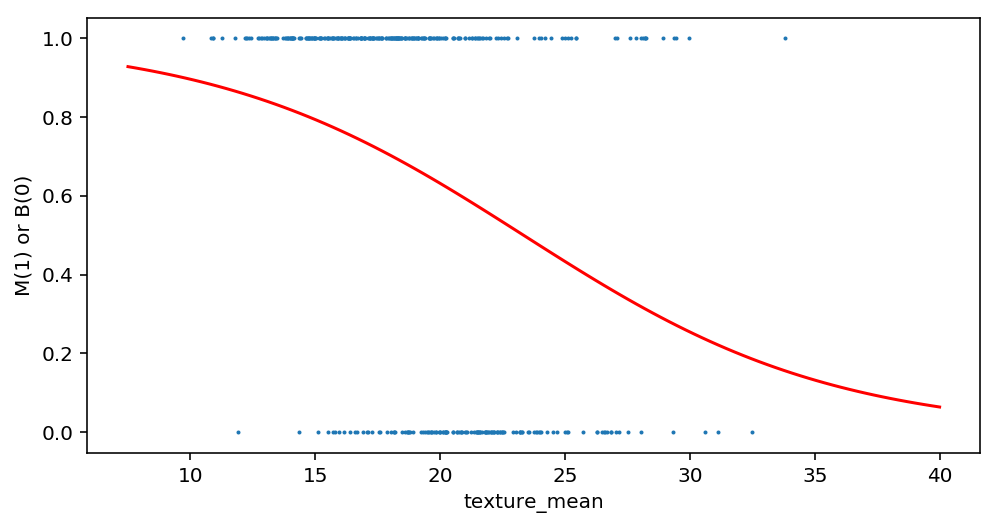

In [132]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("texture_mean")
plt.ylabel("M(1) or B(0)")

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logreg(model.coef_ * XX + model.intercept_)[0], c='r')

In [147]:
X = data # 30개 모두 사용
# 로지스틱 회귀
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model.fit(X_train, y_train) ; print(model.score(X_test, y_test))

# 선형 모델
clf4.fit(X_train, y_train) ; print(clf4.score(X_test, y_test))

# 스케일링 후 선형 모델
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.3)
clf4.fit(X_train, y_train) ; print(clf4.score(X_test, y_test))


0.9649122807017544
0.7192982456140351
0.9473684210526315


/Users/hwa-jongkim/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [153]:
print(cross_val_score(model, X, y, cv=5).mean())
print(cross_val_score(clf4, X_sc, y, cv=5).mean())


0.9509041939207385
0.9613081954597922


/Users/hwa-jongkim/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/hwa-jongkim/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Use

Text(0,0.5,'texture_mean')

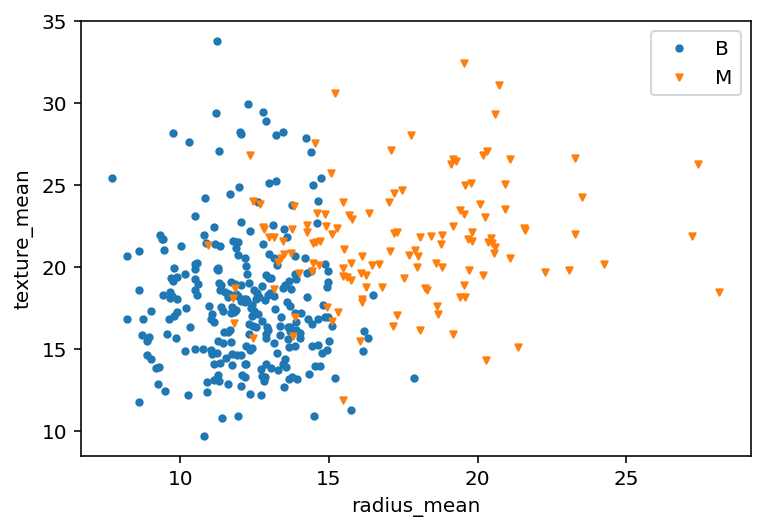

In [24]:
markers = ['o', 'v']
label = ["B", "M"]
for i in range(2):
    xs = X_train["radius_mean"][y_train == i]
    ys = X_train["texture_mean"][y_train == i]
    plt.scatter(xs, ys, marker=markers[i], s=10)
plt.legend(label)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

In [157]:
# 모든 속성을 다 사용한 경우의 kNN의 성능
from sklearn.neighbors import KNeighborsClassifier  
for i in range(1,21,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("K = ", i, "-> Score: {0:.2%}".format(knn.score(X_test, y_test)))

K =  1 -> Score: 91.23%
K =  3 -> Score: 93.57%
K =  5 -> Score: 94.15%
K =  7 -> Score: 92.98%
K =  9 -> Score: 92.40%
K =  11 -> Score: 92.98%
K =  13 -> Score: 92.40%
K =  15 -> Score: 92.40%
K =  17 -> Score: 92.40%
K =  19 -> Score: 92.98%


In [158]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("결정트리 -> {:.2%}".format(tree.score(X_test, y_test)))

결정트리 -> 91.81%


In [159]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
print("랜덤포레스트 : {:.2%}".format(rfc.score(X_test, y_test)))

/Users/hwa-jongkim/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


랜덤포레스트 : 95.32%


## 소프트맥스
- 다항 로지스틱스

In [163]:
score = [1, 2, 3, 4]

prob = []
sum = 0
for i in range(len(score)):
    prob.append(np.exp(score[i]))
    sum = sum + np.exp(score[i])

prob = prob/sum
print(prob.round(3))

[0.032 0.087 0.237 0.644]
